In [1]:

#importing libraries
import numpy as np
import pandas as pd
#keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from keras.wrappers.scikit_learn import KerasClassifier




from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras import regularizers
from keras.layers import Dropout
from keras.utils import to_categorical

# for combining all the hyper-parameters
import itertools 
from time import time
from keras import initializers

In [2]:
# reading training and testing data from the csv file
train_df = pd.read_csv ('../data/monks-2-test.csv',header=None).to_numpy()
test_df = pd.read_csv ('../data/monks-2-train.csv',header=None).to_numpy()

In [3]:
#Preparing train_df for training
train_set = train_df[:, 1:7]
train_label = train_df[:, 0]


#Preparing test_df for testing
test_set = test_df[:, 1:7]
test_label = test_df[:, 0]

In [5]:
# one hot encoding 
def fix_zero(dataset):
  return dataset - 1

def to_one_hot_encoding(dataset):
    fixed_dataset = fix_zero(dataset)
    one_hot_dataset = []
    for column in fixed_dataset.T:
        one_hot_column = to_categorical(column)
        for column_index in range(one_hot_column.shape[1]):
            one_hot_dataset.append(one_hot_column[:,column_index])
    return np.asarray(one_hot_dataset).T

one_hot_train = to_one_hot_encoding(train_set)
one_hot_test  = to_one_hot_encoding(test_set)
# one_hot_train.shape , train_labelset.shape
# one_hot_test.shape , test_labelset.shape

In [6]:
one_hot_train = to_one_hot_encoding(train_set)
one_hot_test  = to_one_hot_encoding(test_set)
one_hot_train.shape , train_label.shape ,one_hot_test.shape , test_label.shape

((432, 17), (432,), (169, 17), (169,))

In [14]:
def create_model(
                    lr=0.1, 
                    num_hidden_units=10,
                    activation_hidden="relu", 
                    activation_out="sigmoid",
                    momentum=0.7, 
                    decay=0.01
                ):
    # create model
    model = Sequential()
    initializer = initializers.GlorotNormal(seed=32) # has the parameter of seed to produce the same random sample.
    model.add(Dense(units=num_hidden_units, kernel_initializer=initializer, input_dim=17, activation=activation_hidden))
#     model.add(Dense(units = num_hidden_units2,activation = activation_hidden2))
    model.add(Dense(1, activation=activation_out)) 

    #optimizer
    sgd = SGD(lr=lr, momentum=momentum, nesterov=False)  # We can add decay to hyper parameter list to get optimum value. 

    # Compile model
    model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])
    return model

In [9]:
# screening 
def plot_accuracy_two_params(history, par_a, value_a, par_b, value_b, axs):
    plt.subplot(axs)
    plt.plot(history.history['accuracy'], label='TR_set')
    plt.plot(history.history['val_accuracy'], label='VL_set')
    axs.set_title('Model Accuracy [' + par_a + ' = ' + str(value_a) + '] [' + par_b + ' = ' + str(value_b) + ']' )
    axs.set_ylabel('Accuracy')
    axs.set_xlabel('Epoch')
    axs.legend(loc='best')

def plot_loss_two_params(history, par_a, value_a, par_b, value_b, axs):
    plt.subplot(axs)
    plt.plot(history.history['loss'], label='TR_set')
    plt.plot(history.history['val_loss'], label='VL_set')
    axs.set_title('Model Loss (MSE) [' + par_a + ' = ' + str(value_a) + '] [' + par_b + ' = ' + str(value_b) + ']' )
    axs.set_ylabel('MSE')
    axs.set_xlabel('Epoch')
    axs.legend(loc='best')

def screening_phase(par_a, values_a, par_b, values_b, plot_function=plot_loss_two_params):
    num_values_a = len(values_a)
    num_values_b = len(values_b)
    f, axs = plt.subplots(nrows= num_values_a, ncols=num_values_b, figsize=(8*num_values_b, 5*num_values_a))
    for i in range(num_values_a):
        for j in range(num_values_b):
            params = {par_a : values_a[i], par_b : values_b[j]}
            model = KerasClassifier(build_fn=create_model, **params)
            history = model.fit(one_hot_train, train_label, validation_data=(one_hot_test, test_label), epochs=90, batch_size=10, verbose=0)
            plot_function(history, par_a, values_a[i], par_b, values_b[j], axs[i][j])
    plt.suptitle('Screening phase on ' + par_a + ' and ' + par_b)
    plt.show()



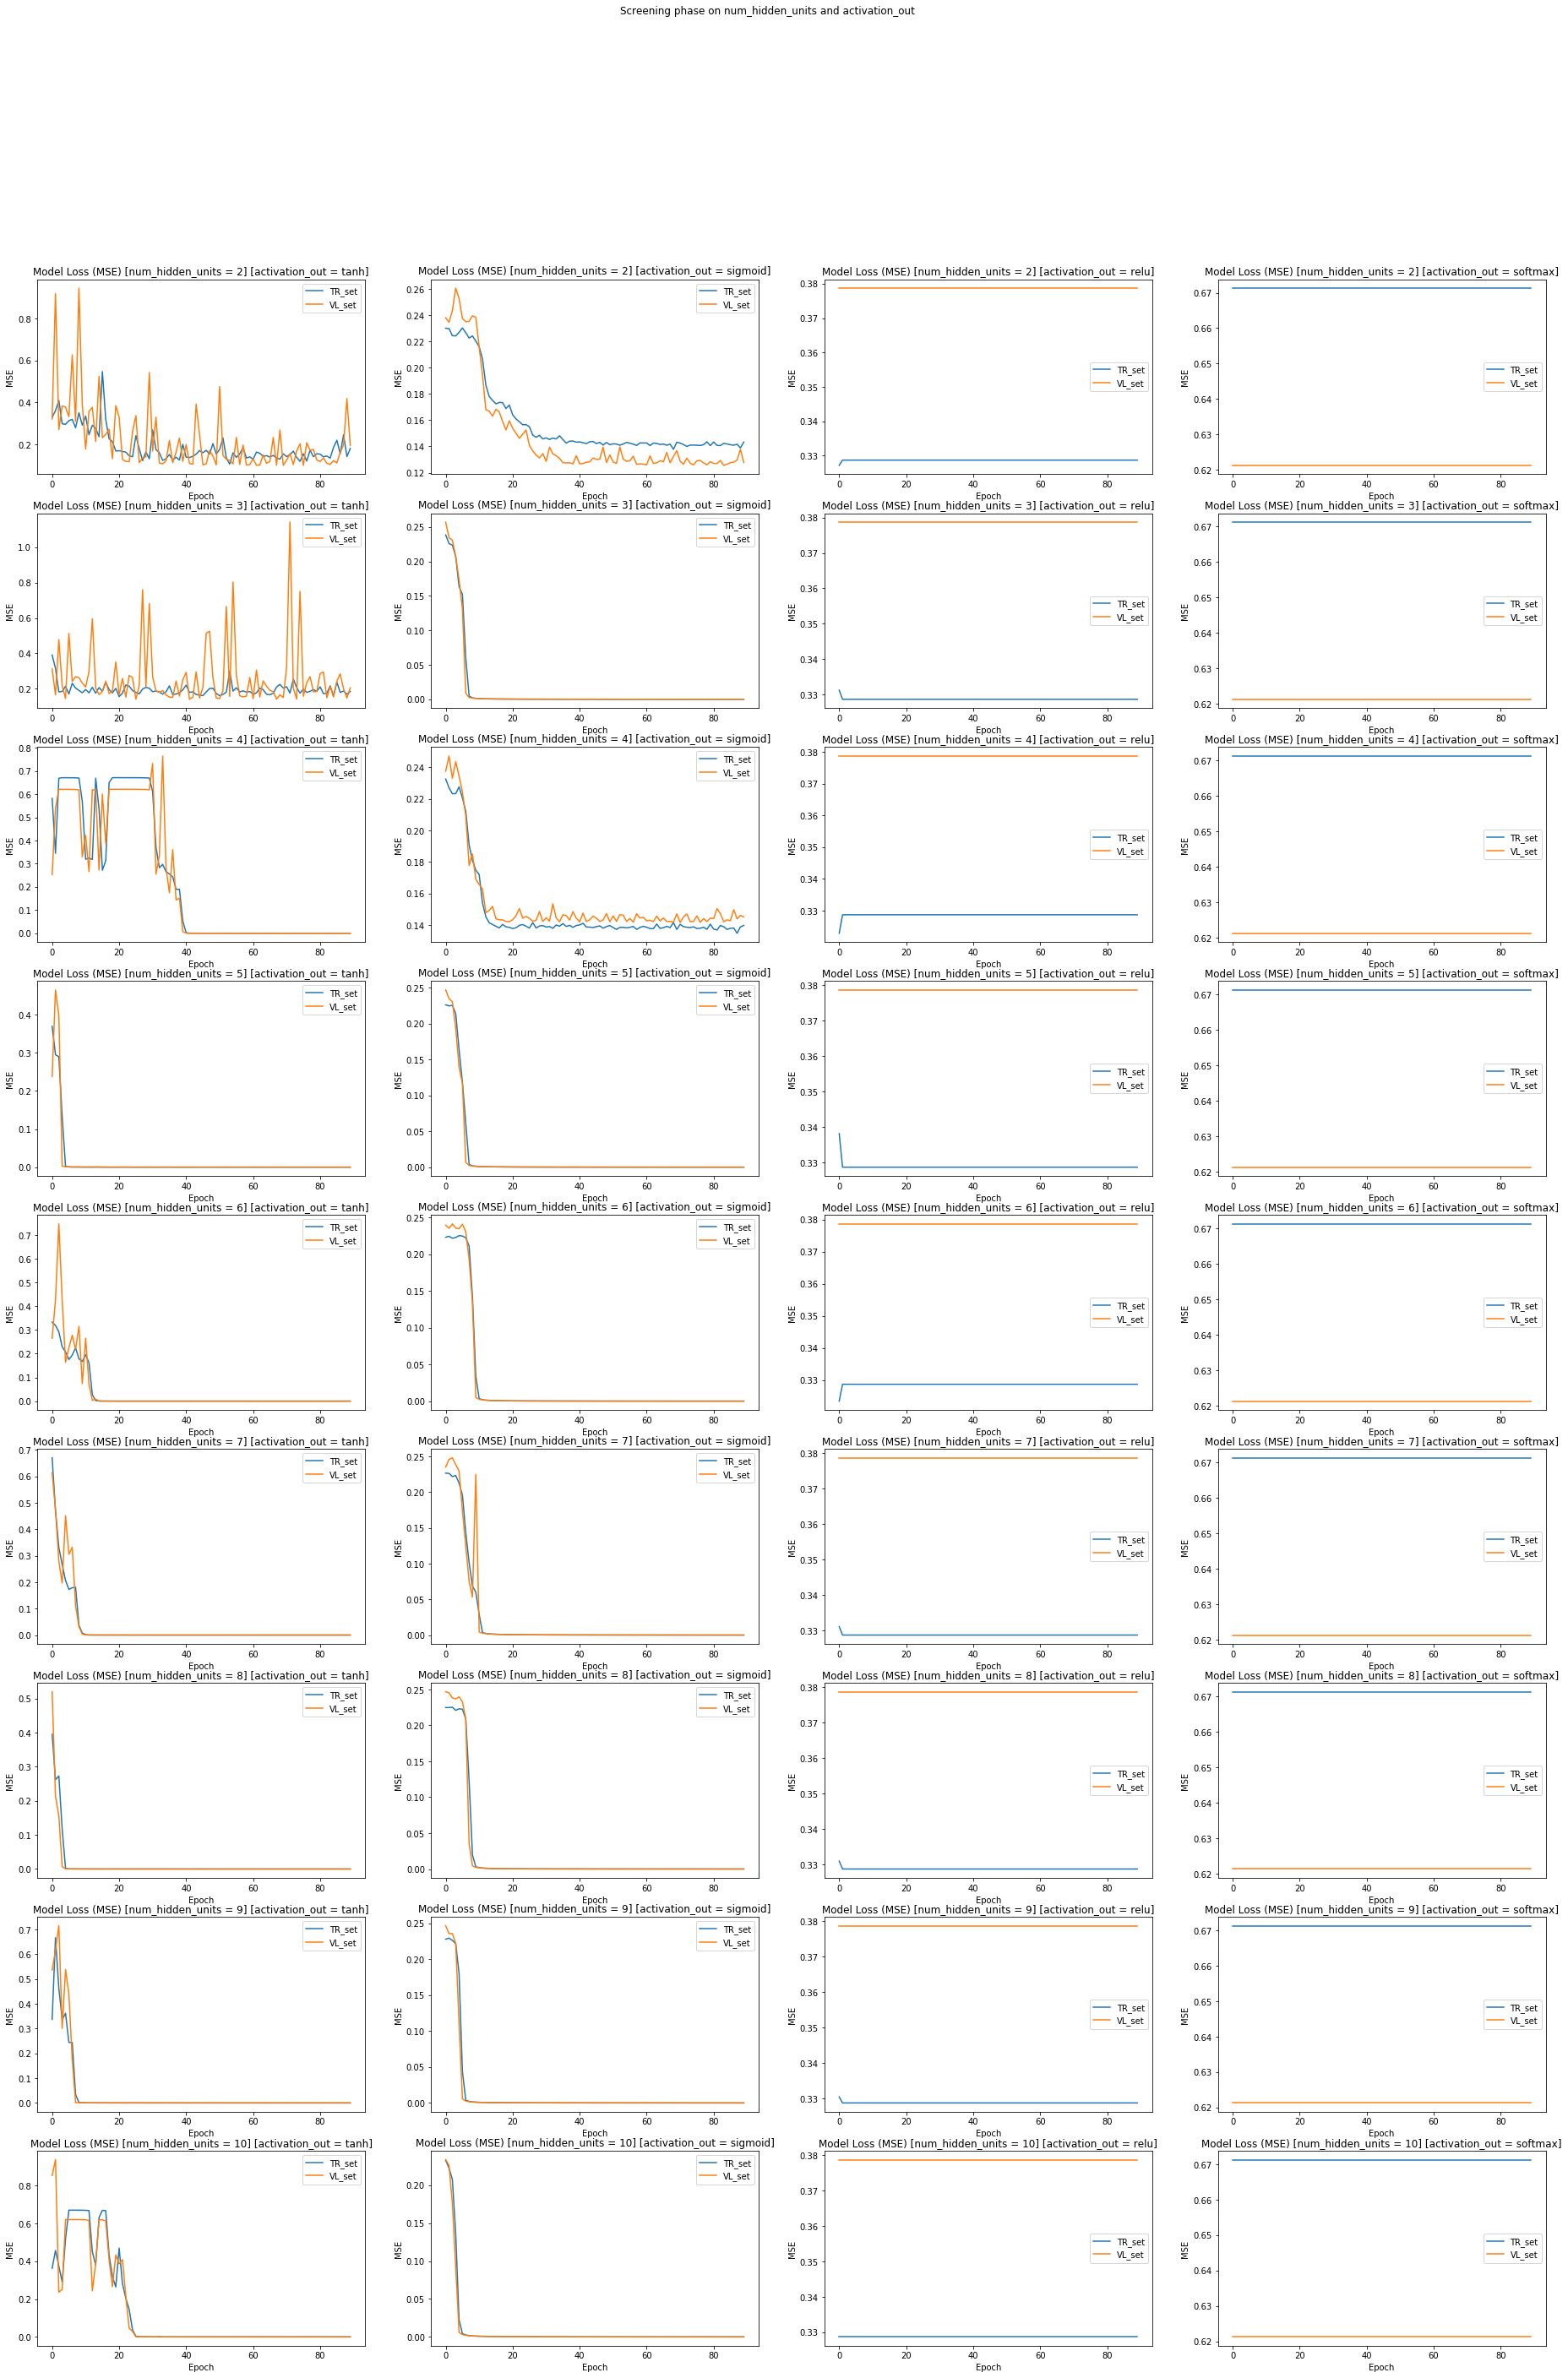

In [11]:
# screening_phase('lr', [0.1,0.01], 'momentum', [0.1,0.5,0.7])
screening_phase( 'num_hidden_units', [2,3,4,5,6,7,8,9,10],'activation_out', ['tanh','sigmoid','relu','softmax'])

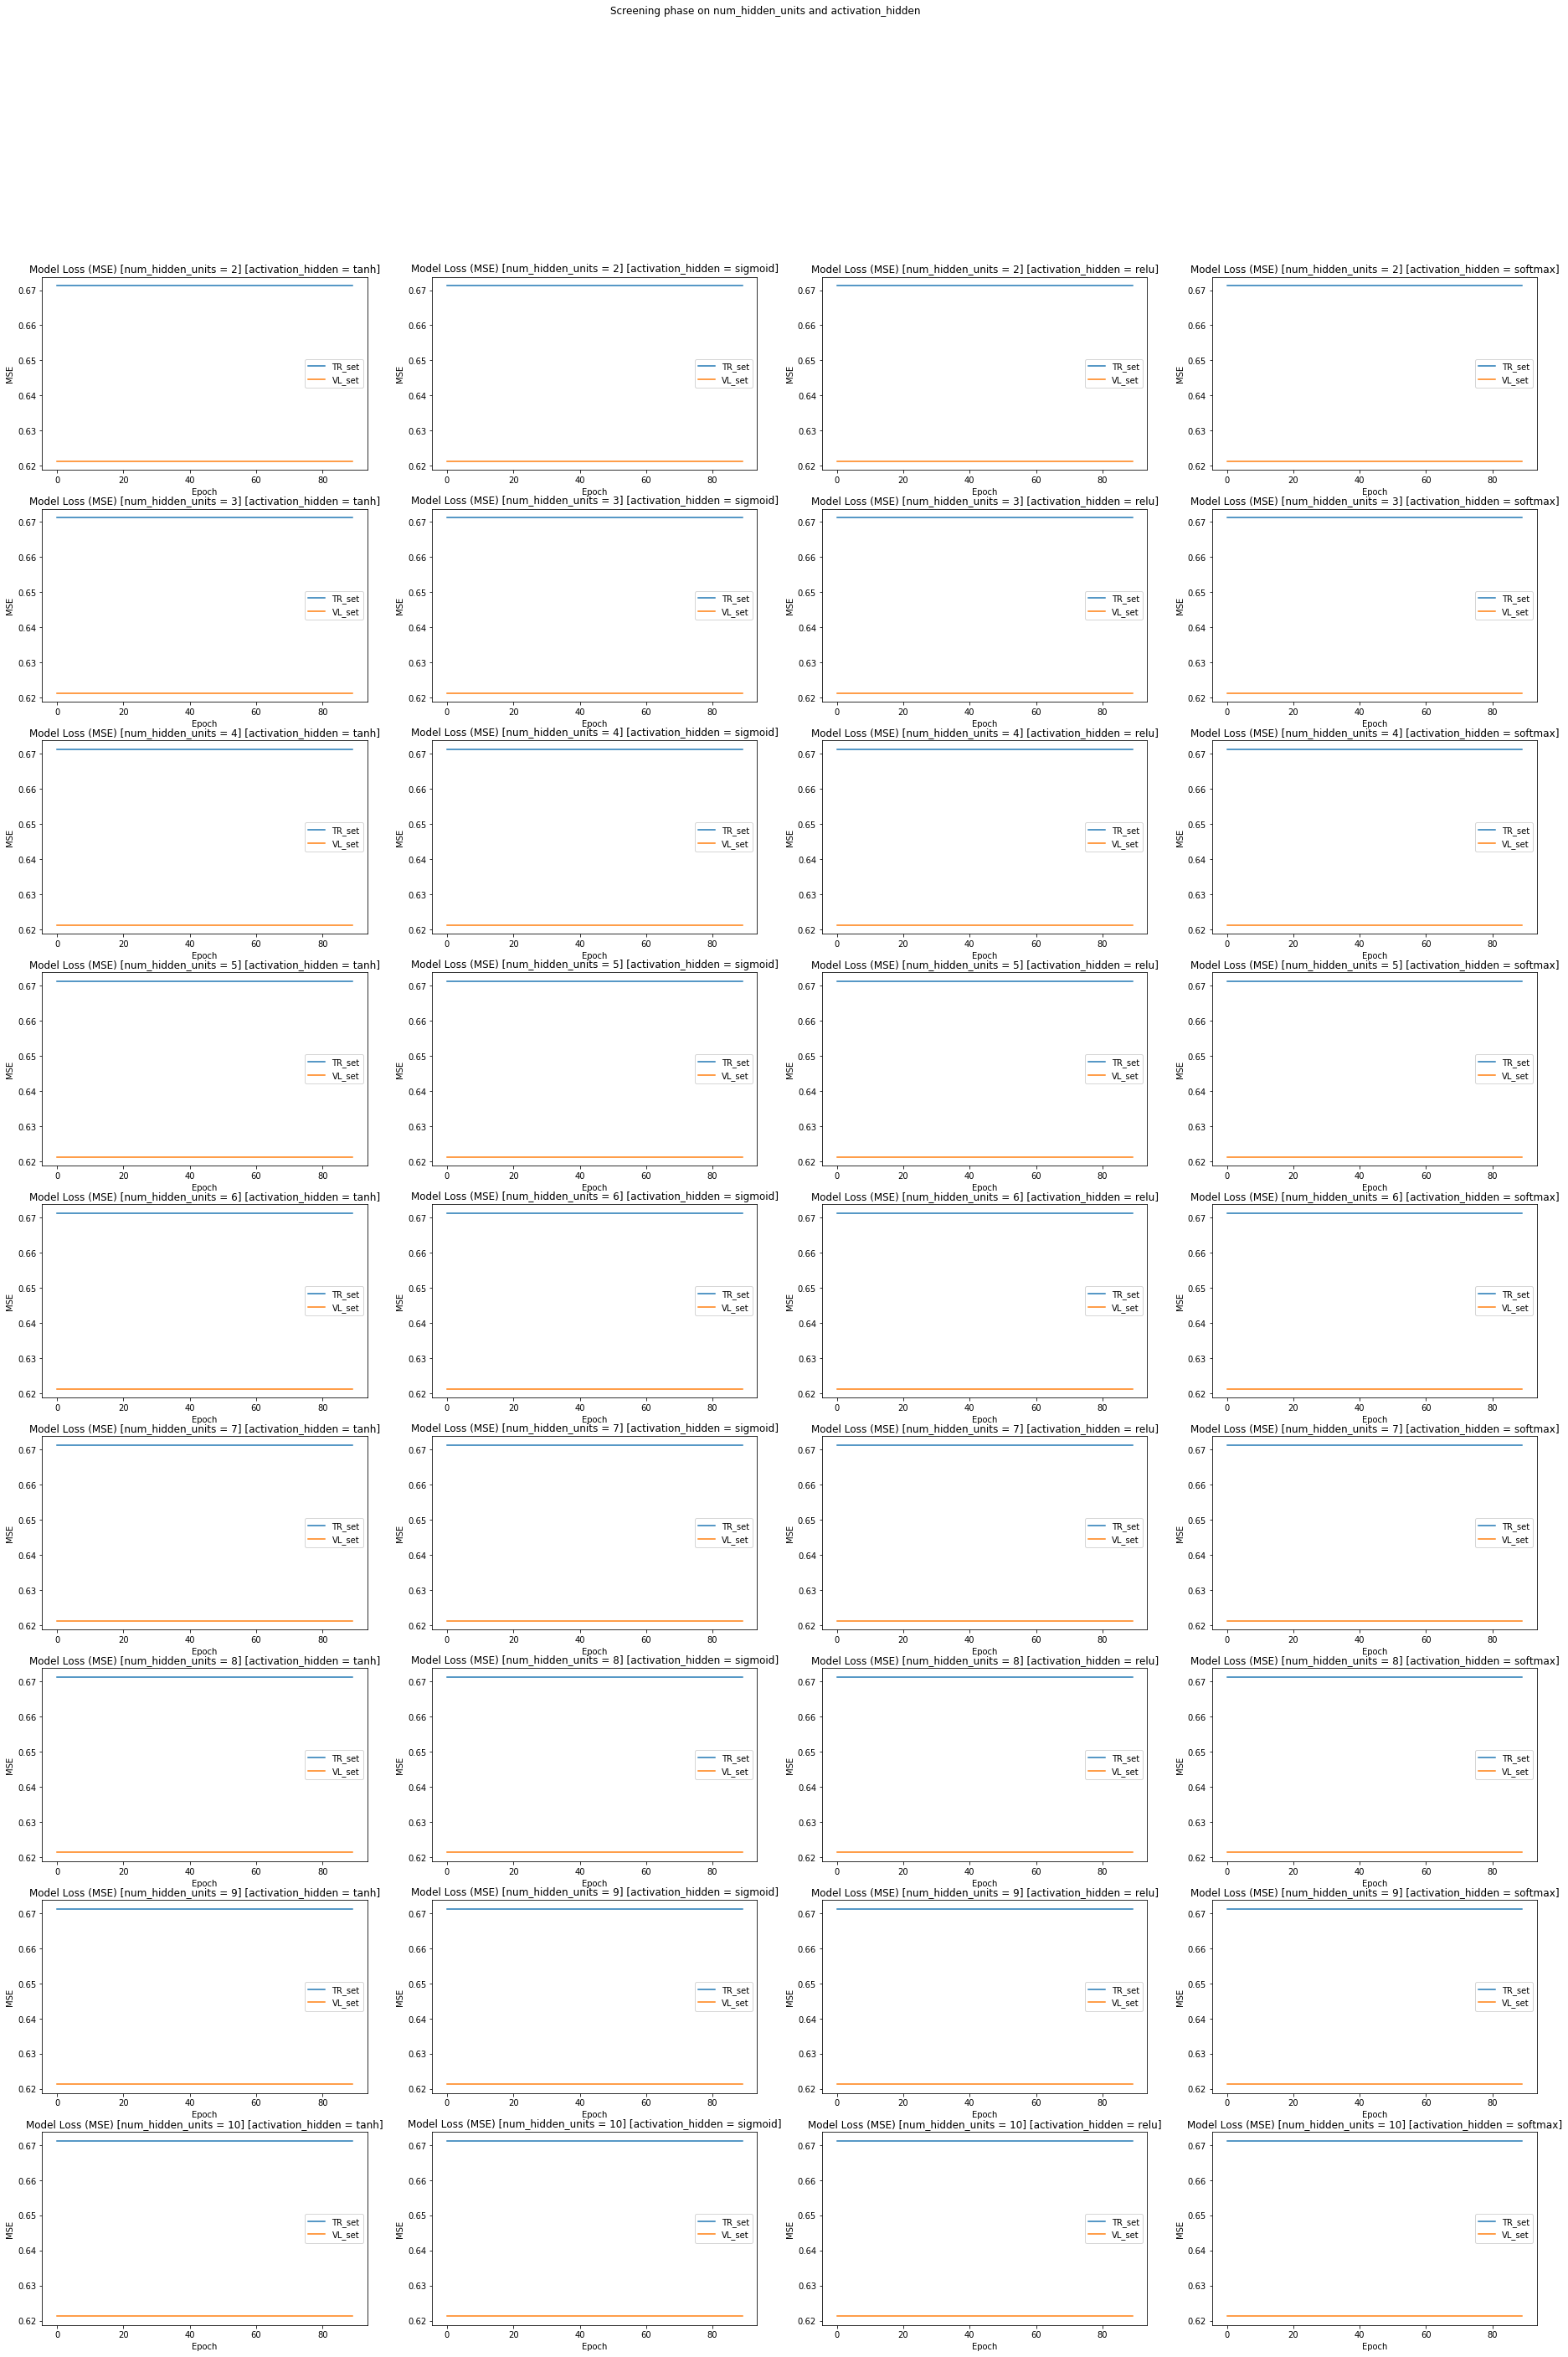

In [12]:
screening_phase( 'num_hidden_units', [2,3,4,5,6,7,8,9,10],'activation_hidden', ['tanh','sigmoid','relu','softmax'])

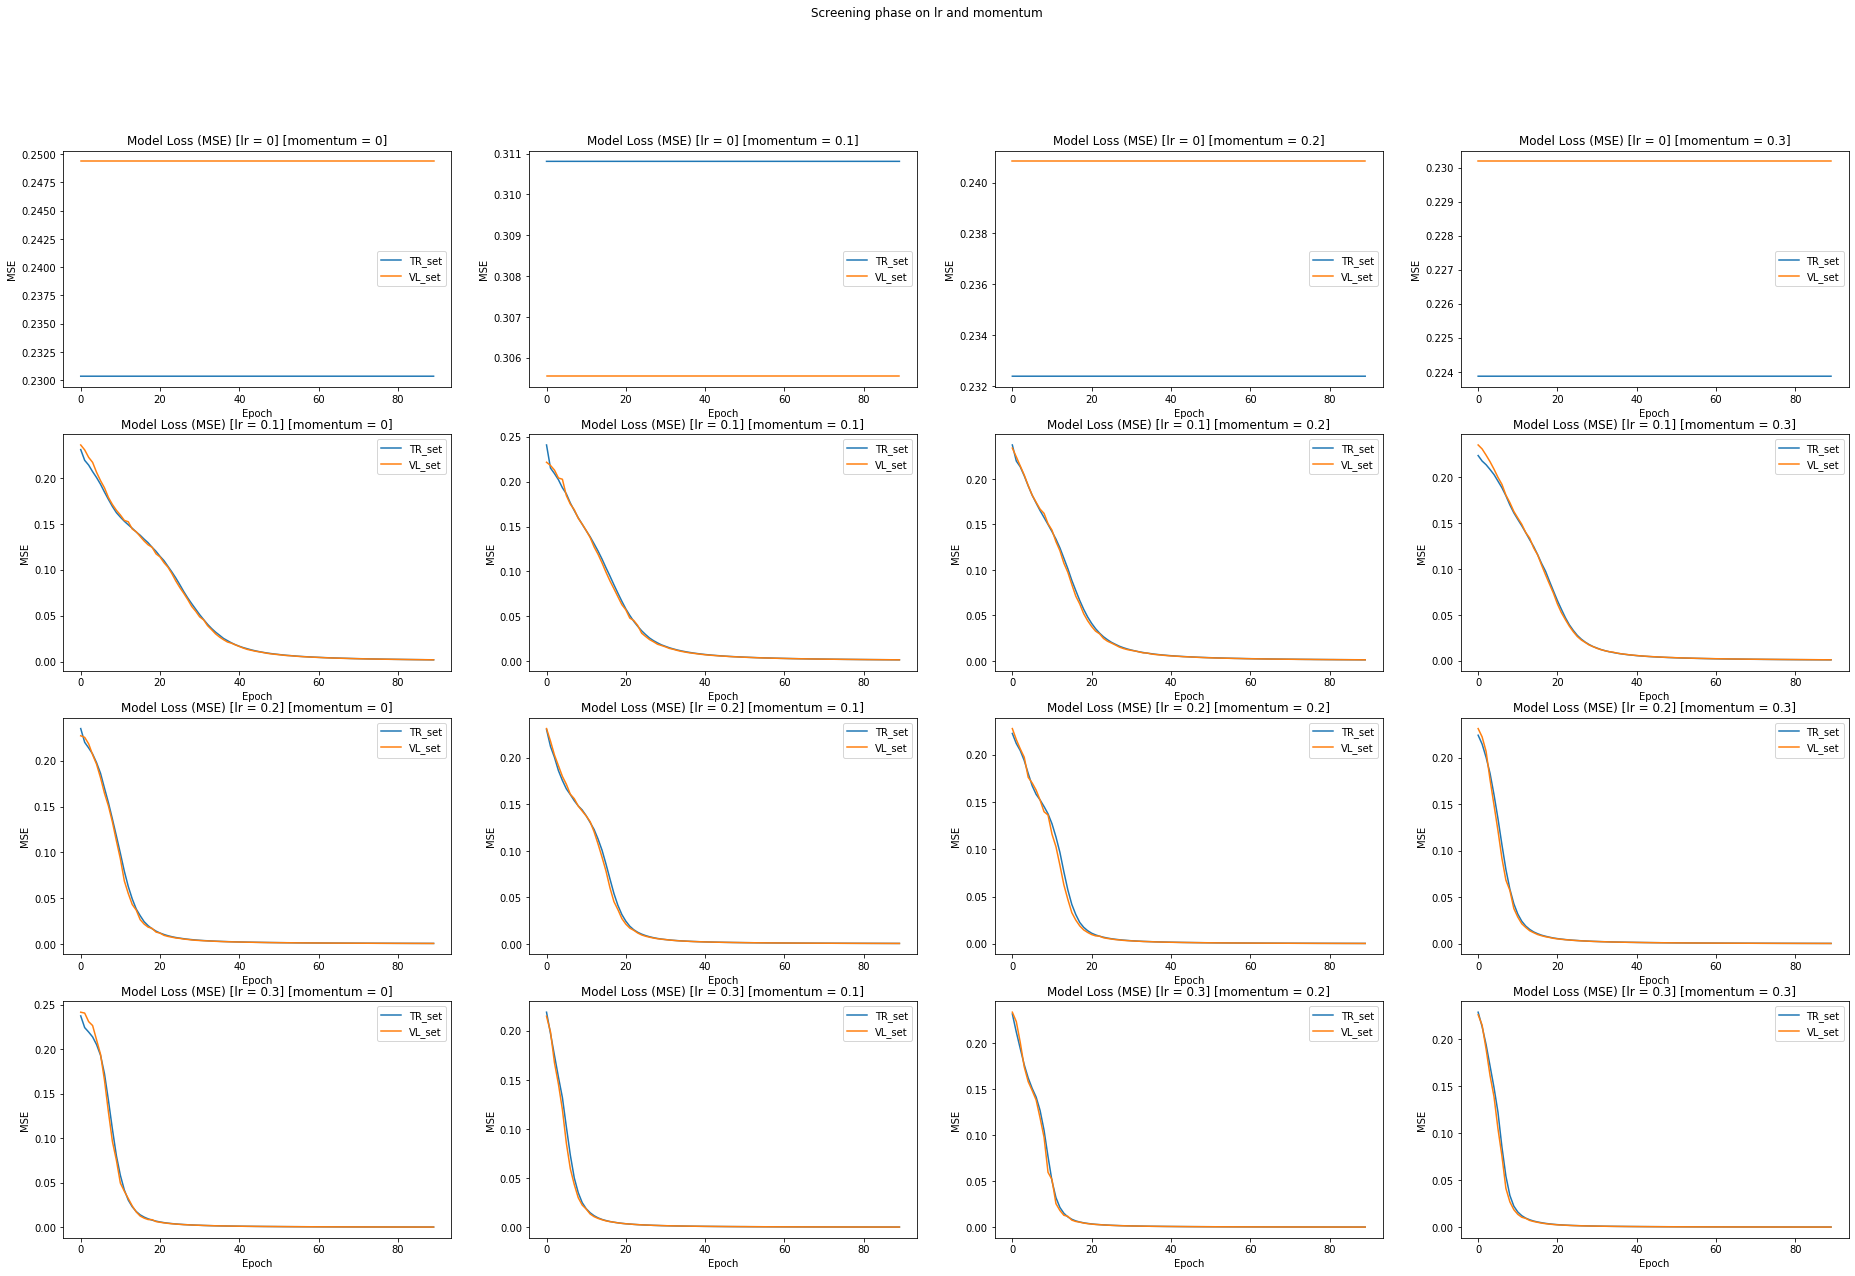

In [15]:
screening_phase( 'lr', [0.1,0.2,0.3],'momentum',[0.1,0.2,0.3] )

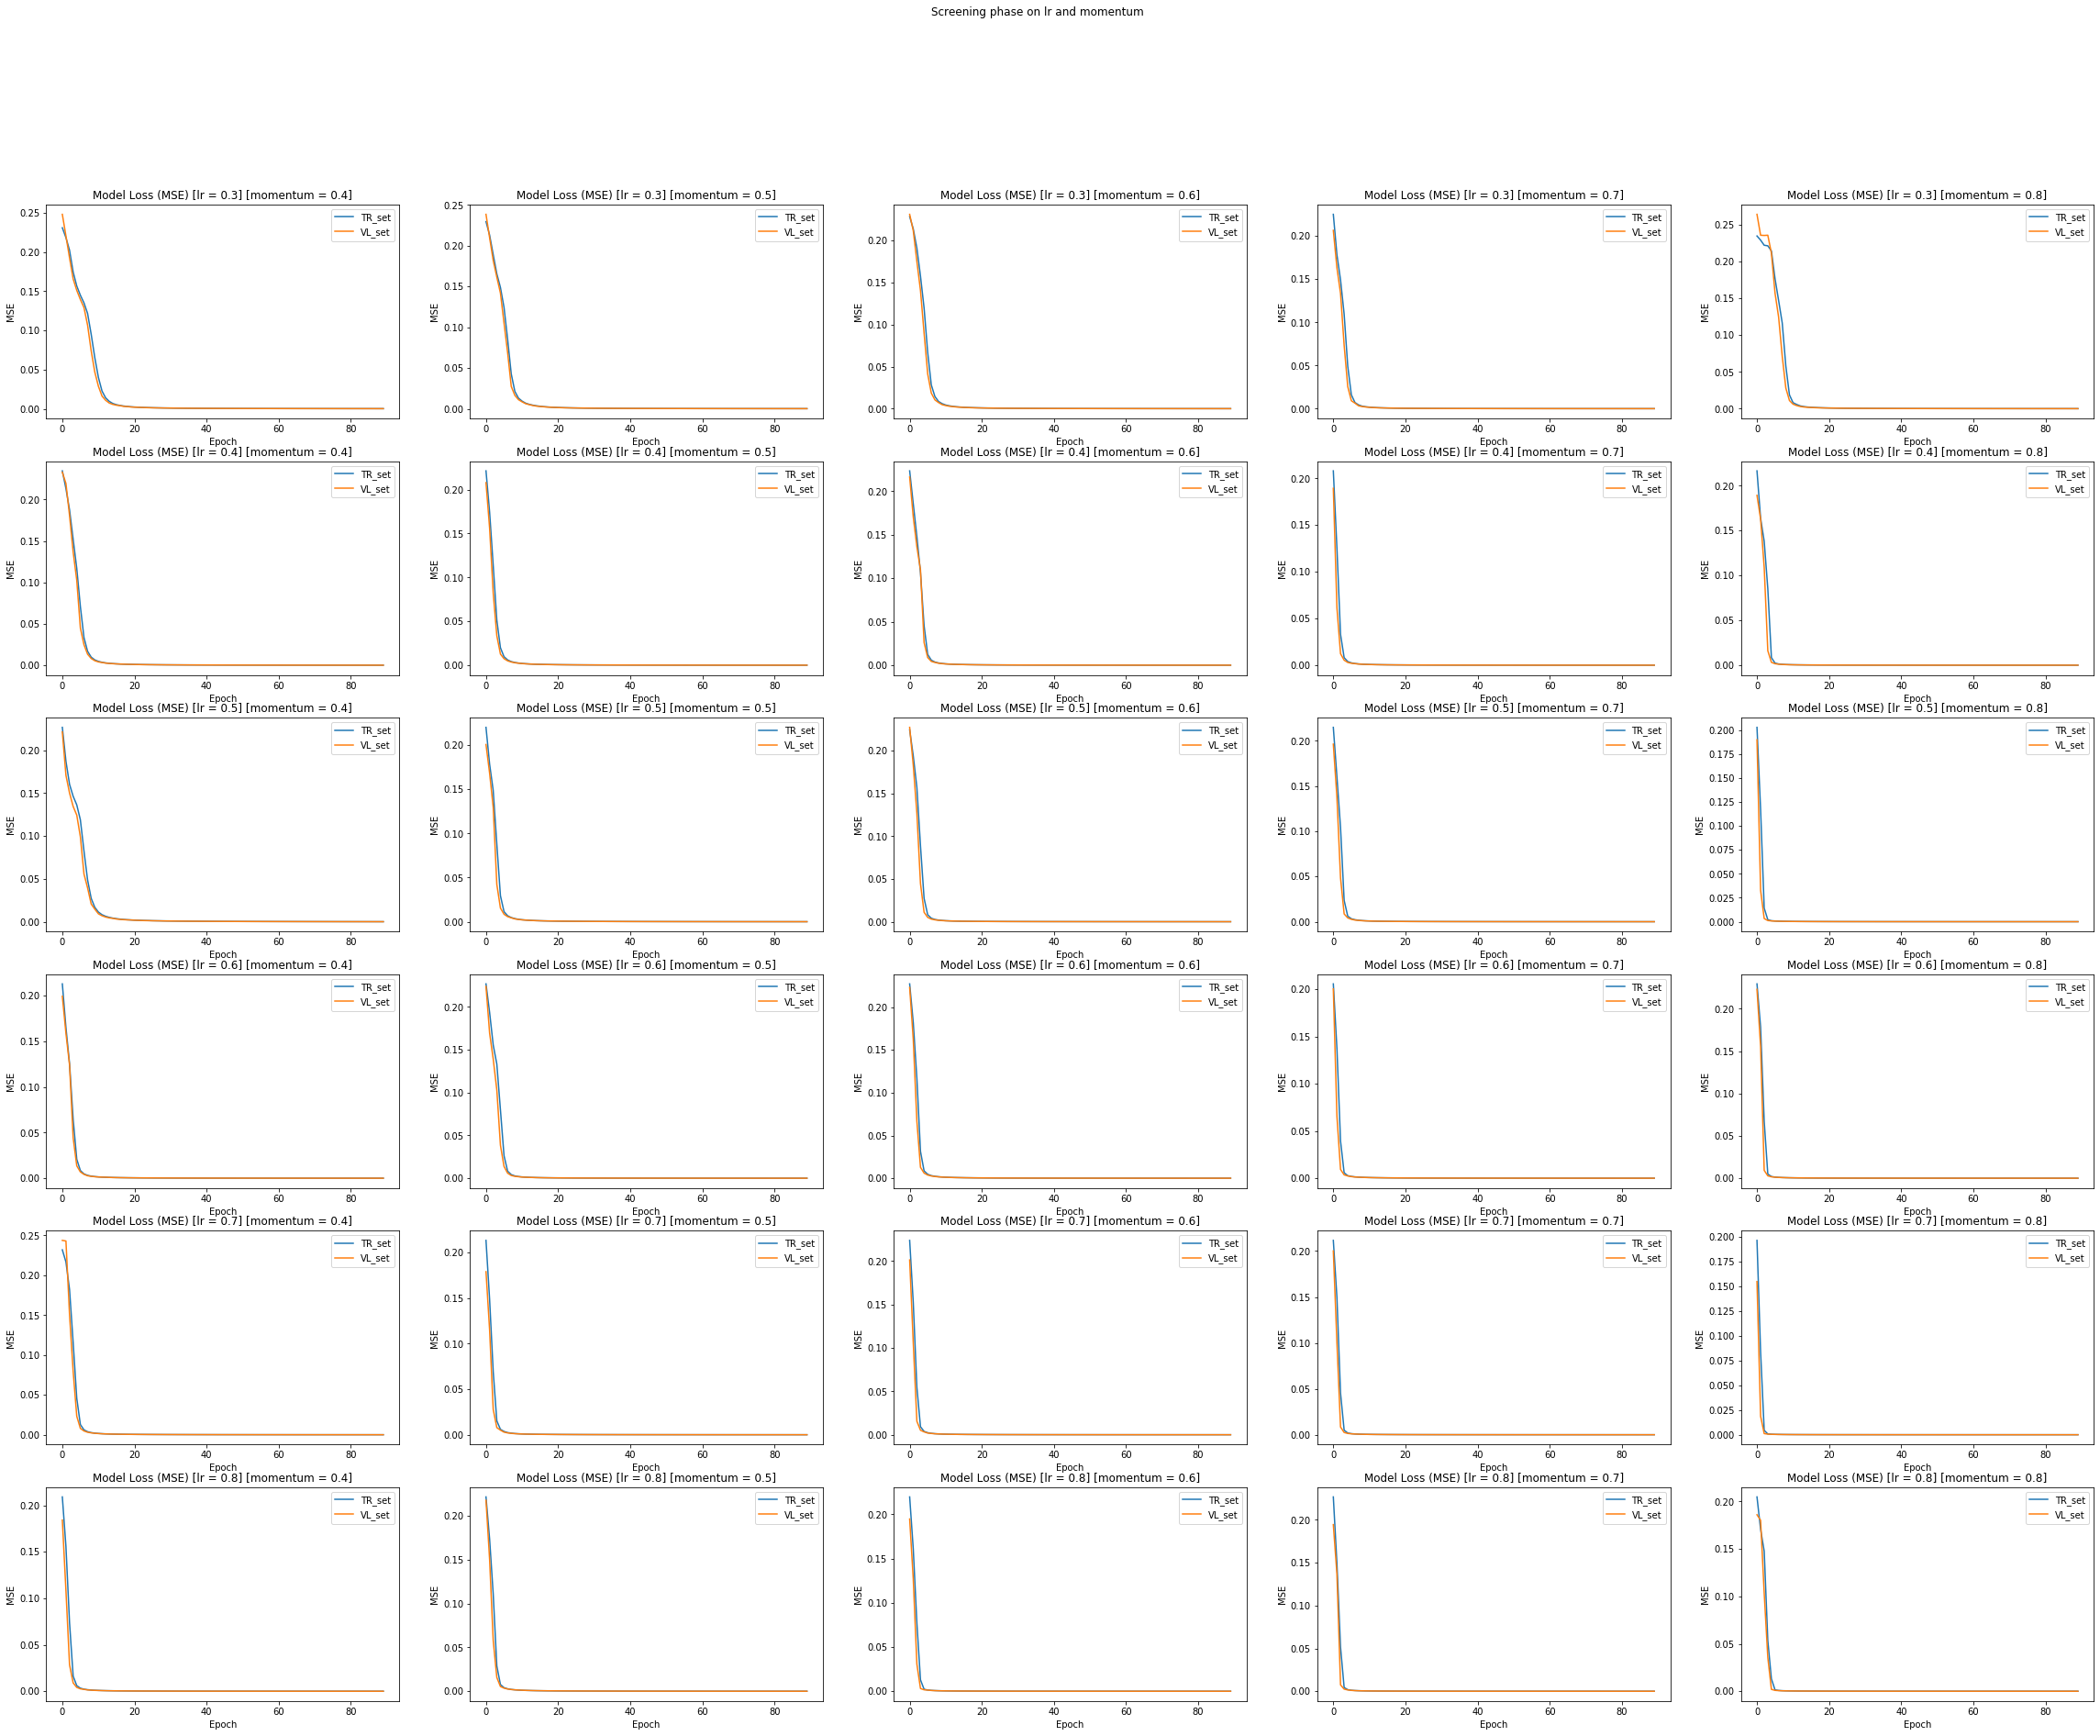

In [16]:
screening_phase( 'lr', [0.3,0.4,0.5,0.6,0.7,0.8],'momentum',[0.4,0.5,0.6,0.7,0.8] )